<a href="https://colab.research.google.com/github/microprediction/microblog/blob/main/OrnsteinUhlenbeckPoll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/jwergieluk/ou_noise.git

In [ ]:
!pip install --upgrade matplotlib

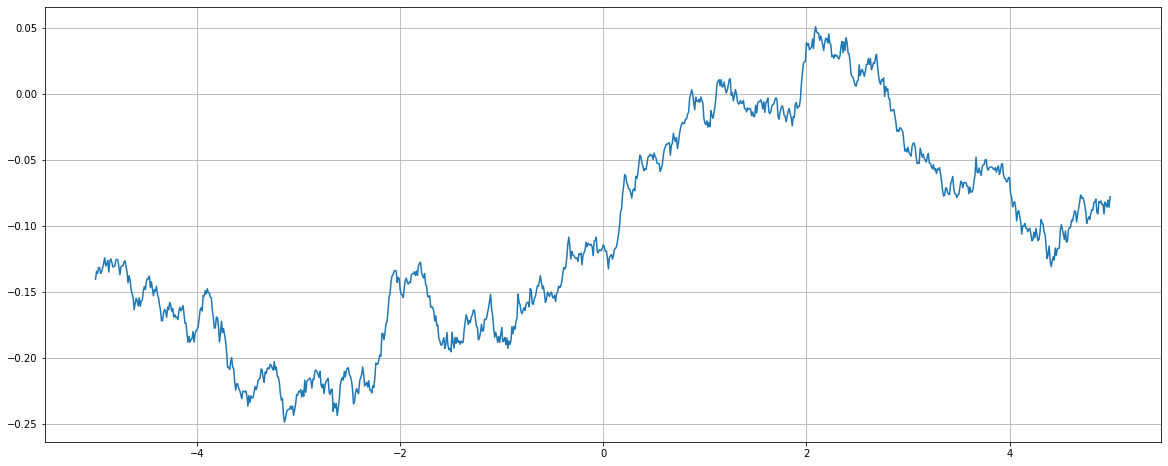

In [106]:
from ou_noise import ou
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('figure', figsize=(20, 8))

all_uncon=list()
for _ in range(1):
  t = numpy.arange(-50, 5, 0.01)
  x = ou.path(0.1, t, 0.02, 0.0, 0.05)  
  all_uncon.append(t[-1000:])
  all_uncon.append(x[-1000:])
plt.plot(*all_uncon);     
plt.grid()
plt.show()                                

# Brute force Brownian Bridge
(2 samples)

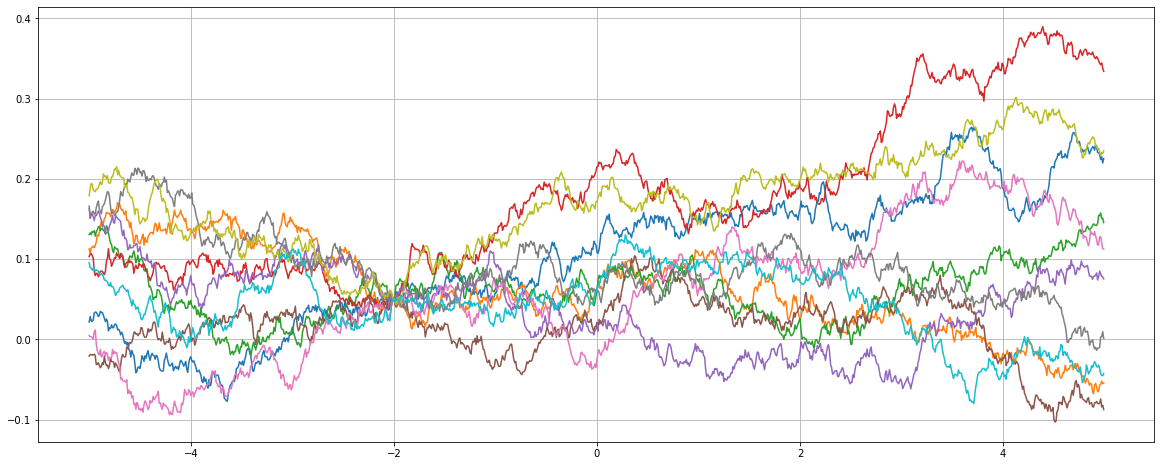

In [83]:
b = 0.05
d = 0.04 
t0 = -1
t1 = 1 
rc('figure', figsize=(20, 8))
import math
t_right = numpy.arange(-2, 5, 0.01)
t_left = numpy.arange(-5,-2,0.01)
all_paths = list()
F = 5
tol = 0.035
for _ in range(10):
   x_right = ou.path(b, t_right, 0.02, 0.0, 0.05)  
   x_left = ou.path( b, t_left, 0.02, 0.0, 0.05) 
   x = list(reversed(x_left)) + list(x_right)
   t = list(t_left) + list(t_right) 
   y1 = math.exp(0.08*F)
   if True:
       all_paths.append(t)
       all_paths.append(x)
plt.plot(*all_paths);
plt.grid()

  




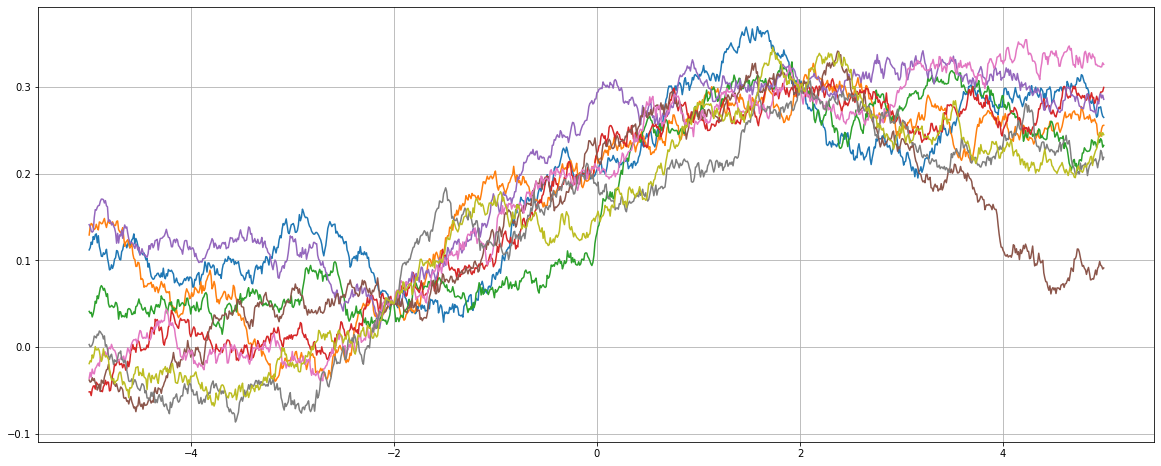

In [102]:
tol = 0.005
cond_paths = list()
for _ in range(10000):
   x_right = ou.path(b, t_right, 0.02, 0.0, 0.05)  
   x_left = ou.path( b, t_left, 0.02, 0.0, 0.05) 
   x = list(reversed(x_left)) + list(x_right)
   t = list(t_left) + list(t_right) 
   y  = numpy.exp(F*x)[300:]
   d = y[-300]
   y1 = math.exp(0.06*F)
   if abs(y1-d)<tol:
       cond_paths.append(t)
       cond_paths.append(x)
plt.plot(*cond_paths);
plt.grid()